## ML_HOTEL_BOOKING_PREDICTION

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\yrmda\OneDrive\Desktop\ML PROJECTS\Hotel Booking\hotel_bookings.csv')   # Here i am using r in path of just beacuse for backward and forward problem. 

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015


# Data Cleaning  


In [5]:
df.shape    # (Rows , Columns)

(119390, 32)

In [6]:
 df.isnull().sum()
    

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df.drop(['agent','company'],axis=1,inplace=True)

In [8]:
df['country'].value_counts().index[0]

'PRT'

In [9]:
df['country'].fillna(df['country'].value_counts().index[0], inplace=True)

In [10]:
df.fillna(0,inplace = True)

In [11]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [12]:
df['children'] ==0

0         True
1         True
2         True
3         True
4         True
          ... 
119385    True
119386    True
119387    True
119388    True
119389    True
Name: children, Length: 119390, dtype: bool

In [13]:
filter1=(df['children']==0) & (df['adults'] ==0) & (df['babies'] ==0) 

In [14]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [15]:
data=df[~filter1]

In [16]:
data.shape

(119210, 30)

# EDA 
* Where do the guest come from
*

In [17]:
  data['is_canceled'].unique()  # Zero Means not cancled and one means cancled

array([0, 1], dtype=int64)

In [18]:
data[data['is_canceled']==0]['country'].value_counts()/len(data[data['is_canceled']==0]) # showing number of % of guest country wise

PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: country, Length: 165, dtype: float64

In [19]:
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns=['country', 'No._of_Guest']


In [20]:
country_wise_data.head(10)

,country,No._of_Guest
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
5,IRL,2542
6,ITA,2428
7,BEL,1868
8,NLD,1716
9,USA,1592


## Number of Guest _ County wis by Geographycal  

In [21]:
# !pip install ploty

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement ploty (from versions: none)
ERROR: No matching distribution found for ploty


In [24]:
# !pip install chart_studio

In [25]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs ,init_notebook_mode , plot ,iplot
init_notebook_mode(connected=True)

In [26]:
import plotly.express as px

In [27]:
map_guest=px.choropleth(country_wise_data,
            locations=country_wise_data['country'],
            color=country_wise_data['No._of_Guest'],
            hover_name=country_wise_data['country'],
            title='Home Country of Guests')

In [28]:
map_guest.show()

In [29]:
data2=data[data['is_canceled']==0]

In [30]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'price(EUR)')

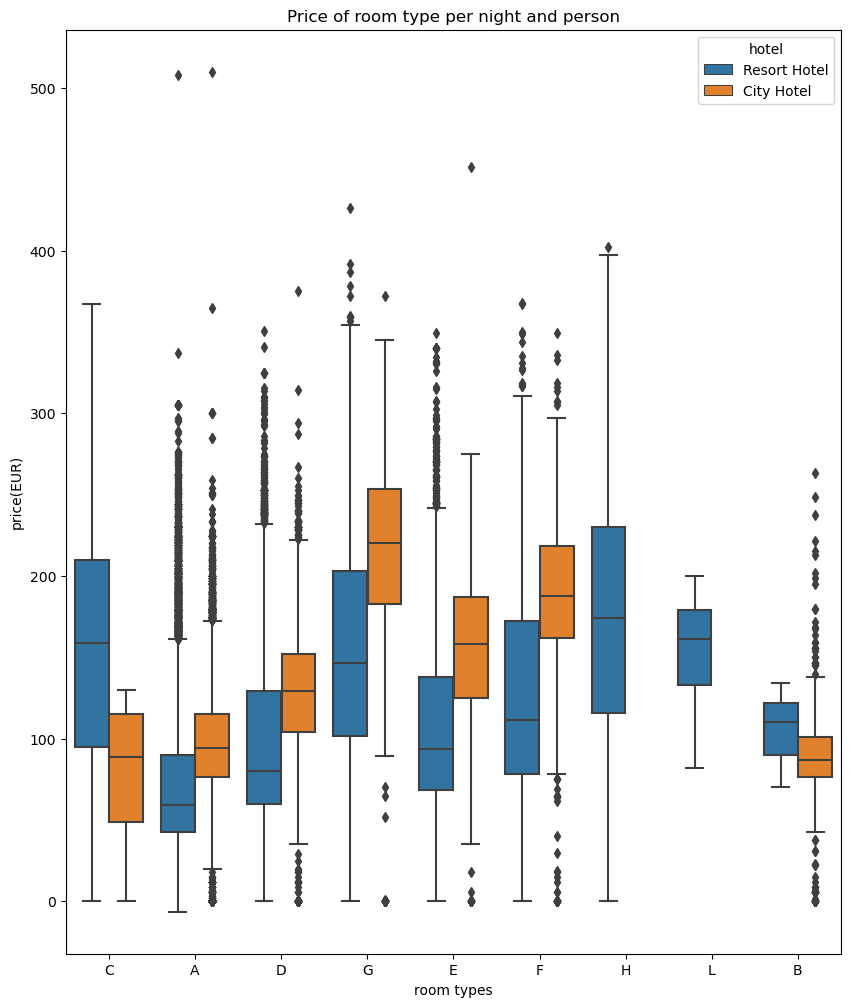

In [31]:
plt.figure(figsize=(10,12))
sns.boxplot(x='reserved_room_type',y='adr', hue='hotel',data=data2 )   # adr = avg. daily rate
plt.title('Price of room type per night and person')
plt.xlabel('room types')
plt.ylabel('price(EUR)')

# Analysing the demand of Hotels

In [32]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [33]:
data_resort=data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]

In [34]:
data_city=data[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]

In [35]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns =['month','no.of_guests']
rush_resort

,month,no.of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [36]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns =['month','no.of_guests']
rush_city

,month,no.of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [37]:
final_rush=rush_resort.merge(rush_city, on='month')

In [38]:
final_rush.columns=['month','no. of guests_in_resort','no.of_guests_city']

In [39]:
final_rush.head(10)

,month,no. of guests_in_resort,no.of_guests_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [40]:
final_rush.columns

Index(['month', 'no. of guests_in_resort', 'no.of_guests_city'], dtype='object')

In [41]:
px.line(data_frame=final_rush, x='month', y=['no. of guests_in_resort', 'no.of_guests_city'])

In [42]:
final_rush.head(3)

,month,no. of guests_in_resort,no.of_guests_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326


### Sorting the month for line chart for be

In [43]:


final_rush= pd.DataFrame(final_rush)

# Create a custom order for sorting
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Sort the DataFrame by the 'Month' column using the custom order
final_rush['month'] = pd.Categorical(final_rush['month'], categories=month_order, ordered=True)
final_rush = final_rush.sort_values('month')



In [44]:
px.line(data_frame=final_rush, x='month', y=['no. of guests_in_resort', 'no.of_guests_city'])

# Lets Analyse which month has highest avg. daily rate

In [45]:

data= pd.DataFrame(data)

# Create a custom order for sorting
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Sort the DataFrame by the 'Month' column using the custom order
data['arrival_date_month'] = pd.Categorical(data['arrival_date_month'], categories=month_order, ordered=True)
data = data.sort_values('arrival_date_month')

data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
13803,Resort Hotel,0,7,2016,January,3,13,0,2,1,...,D,0,No Deposit,0,Transient,27.0,0,0,Check-Out,1/15/2016
9944,Resort Hotel,1,17,2017,January,4,28,0,1,1,...,A,0,Non Refund,0,Transient-Party,32.0,0,0,Canceled,1/28/2017
9945,Resort Hotel,1,94,2017,January,4,28,0,1,2,...,A,0,No Deposit,0,Transient,42.0,0,1,Canceled,10/27/2016
9946,Resort Hotel,1,2,2017,January,4,28,0,1,2,...,E,0,No Deposit,0,Transient,76.0,0,1,Canceled,1/28/2017
9947,Resort Hotel,1,17,2017,January,4,28,0,1,2,...,A,0,Non Refund,0,Transient-Party,36.0,0,0,Canceled,1/11/2017


<function matplotlib.pyplot.show(close=None, block=None)>

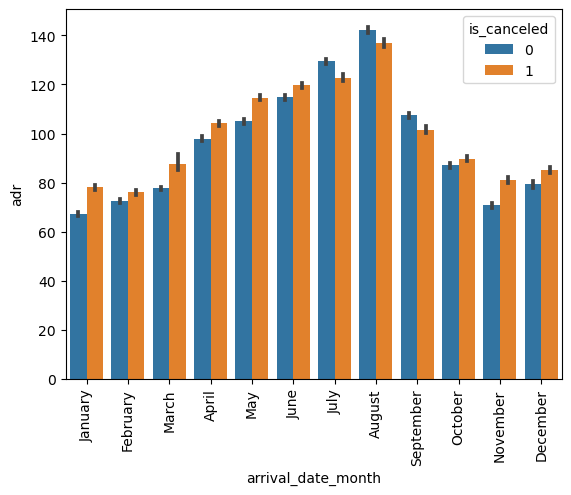

In [46]:
sns.barplot(x='arrival_date_month', y='adr',data=data,hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show     # Here we can see the most of the time booking cancled

(0.0, 800.0)

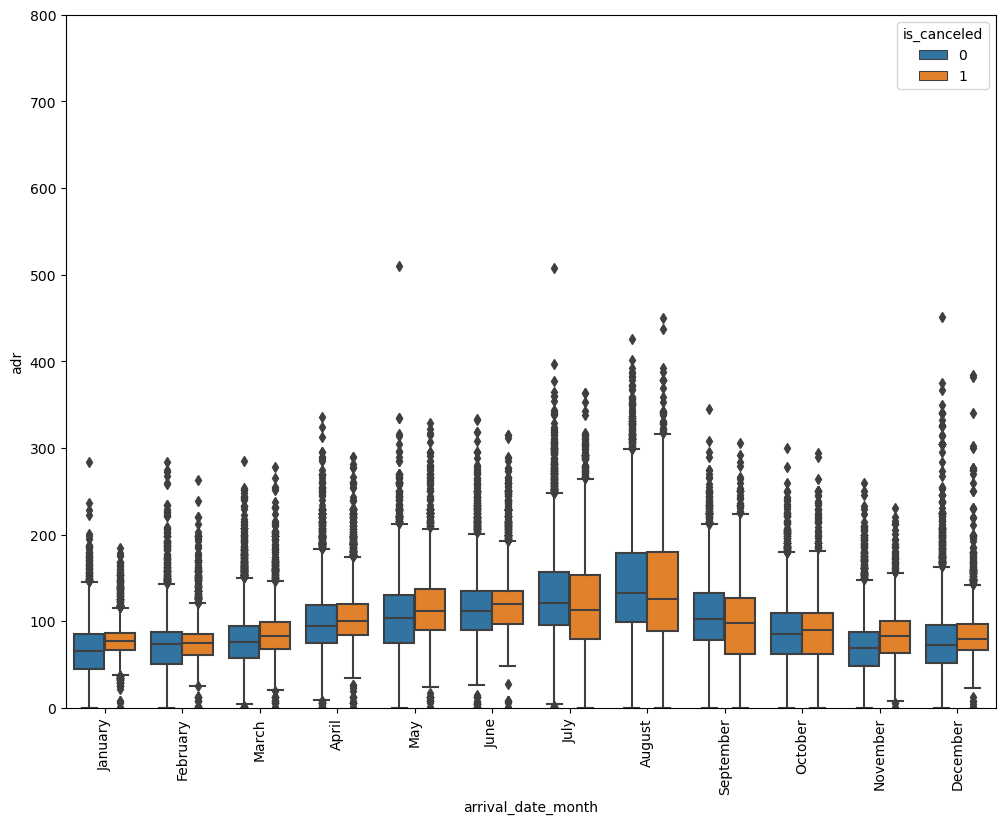

In [65]:
plt.figure(figsize=(12,9))
sns.boxplot(x='arrival_date_month', y='adr',data=data,hue='is_canceled')
plt.xticks(rotation='vertical')
plt.ylim(0,800)

# Advanced data analysis

* Booking were made only for weekdays or weekends or both

In [47]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [48]:
pd. crosstab(index=data['stays_in_weekend_nights'], columns=data['stays_in_week_nights']) 

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
def week_function(row ):
    feature1='stays_in_weekend_nights'
    feature2='stays_in_week_nights'
    if row[feature1]==0 and row[feature2]>0:
        return 'stay_just_keekdays'
    elif row[feature1]>0 and row[feature2]==0:
        return 'stay_just_weekend'
    elif row[feature1]>0 and row[feature2]>0:
        return 'stay_both_weekdays_weekend'
    else:
        return 'undefined'

In [50]:
data2['weekend_or_weekday']=data2.apply(week_function, axis=1)

In [51]:
data2.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_keekdays


In [52]:
data2['weekend_or_weekday'].value_counts()

stay_both_weekdays_weekend    37551
stay_just_keekdays            31788
stay_just_weekend              5050
undefined                       622
Name: weekend_or_weekday, dtype: int64

In [53]:
 group_data=data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index() # convert into table (unstack)

In [54]:
group_data.head(3)

weekend_or_weekday,arrival_date_month,stay_both_weekdays_weekend,stay_just_keekdays,stay_just_weekend,undefined
0,April,3627,2559,344,30
1,August,4929,3137,509,49
2,December,1901,2123,298,69


In [55]:
group_data= pd.DataFrame(group_data)

# Create a custom order for sorting
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Sort the DataFrame by the 'Month' column using the custom order
group_data['arrival_date_month'] = pd.Categorical(group_data['arrival_date_month'], categories=month_order, ordered=True)
sorted_group_data = group_data.sort_values('arrival_date_month')

sorted_group_data.head()

weekend_or_weekday,arrival_date_month,stay_both_weekdays_weekend,stay_just_keekdays,stay_just_weekend,undefined
4,January,1550,2125,393,47
3,February,2438,2514,360,47
7,March,3151,3060,359,50
0,April,3627,2559,344,30
8,May,3442,3017,570,74


<Axes: >

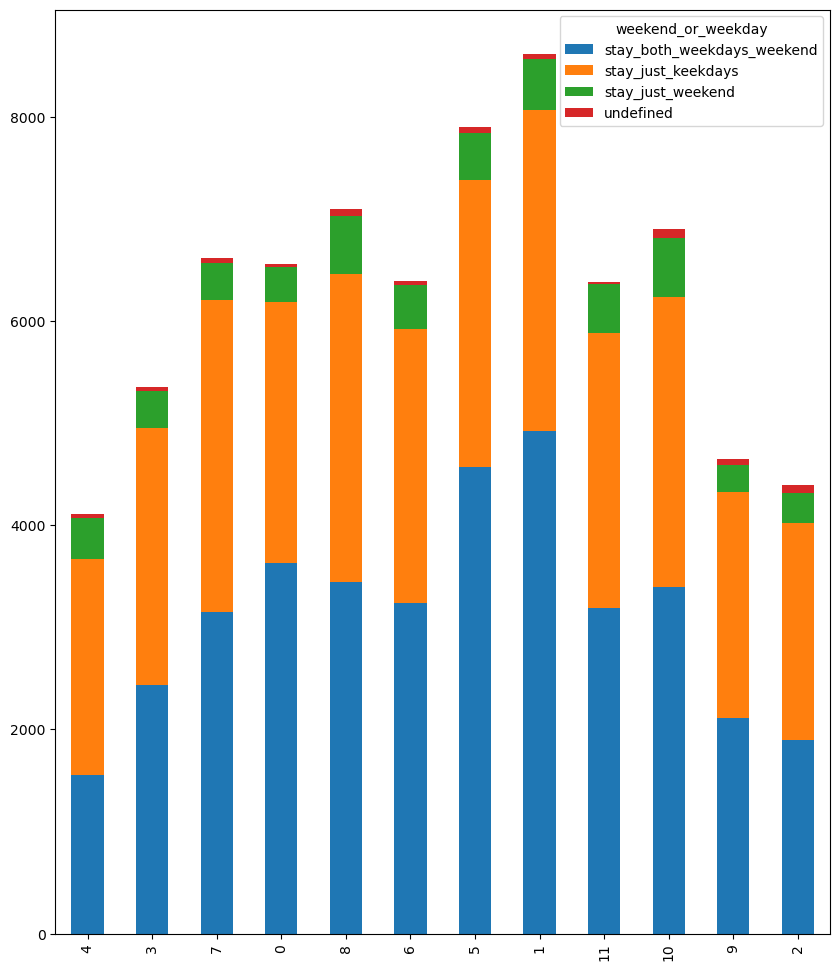

In [100]:
sorted_group_data.plot(kind='bar',stacked=True, figsize=(10,12)) 

# Creating feature for model

In [61]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [68]:
def family(row):
    if (row['adults']>0) & (row['children'] >0 or row['babies']>0):
        return 1
    else :
        return 0

In [70]:
data['is_family']=data.apply(family,axis=1)

In [71]:
data.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family
13803,Resort Hotel,0,7,2016,January,3,13,0,2,1,...,0,No Deposit,0,Transient,27.0,0,0,Check-Out,1/15/2016,0
9944,Resort Hotel,1,17,2017,January,4,28,0,1,1,...,0,Non Refund,0,Transient-Party,32.0,0,0,Canceled,1/28/2017,0


In [72]:
data['total_customer']=data['adults'] + data['children'] + data['babies']

In [73]:
data['total_nights'] = data['stays_in_week_nights'] + data['stays_in_weekend_nights']

In [74]:
data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights
13803,Resort Hotel,0,7,2016,January,3,13,0,2,1,...,0,Transient,27.0,0,0,Check-Out,1/15/2016,0,1.0,2
9944,Resort Hotel,1,17,2017,January,4,28,0,1,1,...,0,Transient-Party,32.0,0,0,Canceled,1/28/2017,0,1.0,1
9945,Resort Hotel,1,94,2017,January,4,28,0,1,2,...,0,Transient,42.0,0,1,Canceled,10/27/2016,0,2.0,1


In [75]:
data['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [76]:
dict1={'No Deposit': 0, 'Non Refund':1, 'Refundable':0}

In [78]:
data['deposit_given']=data['deposit_type'].map(dict1)

In [79]:
data.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights,deposit_given
13803,Resort Hotel,0,7,2016,January,3,13,0,2,1,...,Transient,27.0,0,0,Check-Out,1/15/2016,0,1.0,2,0
9944,Resort Hotel,1,17,2017,January,4,28,0,1,1,...,Transient-Party,32.0,0,0,Canceled,1/28/2017,0,1.0,1,1


In [80]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [82]:
data.drop(columns=['adults', 'children', 'babies','deposit_type'], axis=1, inplace=True)

In [83]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

# feature Encoding On Categorical Data 
* Mean Encoding

In [84]:
data.dtypes

hotel                               object
is_canceled                          int64
lead_time                            int64
arrival_date_year                    int64
arrival_date_month                category
arrival_date_week_number             int64
arrival_date_day_of_month            int64
stays_in_weekend_nights              int64
stays_in_week_nights                 int64
meal                                object
country                             object
market_segment                      object
distribution_channel                object
is_repeated_guest                    int64
previous_cancellations               int64
previous_bookings_not_canceled       int64
reserved_room_type                  object
assigned_room_type                  object
booking_changes                      int64
days_in_waiting_list                 int64
customer_type                       object
adr                                float64
required_car_parking_spaces          int64
total_of_sp

In [96]:
cat_feature=[col for col in data.columns if data[col].dtype =='object']

In [104]:
num_feature=[col for col in data.columns if data[col].dtype =='int64']

In [105]:
# cat_feature
num_feature

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_nights',
 'deposit_given']

In [109]:
data_cat=data[cat_feature]

In [108]:
data_num=data[num_feature]

In [126]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict()   # Mean encoding

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [117]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [118]:
data_cat['cancellation']=data['is_canceled']

In [119]:
data_cat.head(2)

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
13803,Resort Hotel,BB,PRT,Corporate,Corporate,A,D,Transient,Check-Out,1/15/2016,0
9944,Resort Hotel,BB,PRT,Groups,Corporate,A,A,Transient-Party,Canceled,1/28/2017,1


In [123]:
cols=data_cat.columns
cols

Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'customer_type',
       'reservation_status', 'reservation_status_date', 'cancellation'],
      dtype='object')

In [143]:
cols=cols[0:-1]

In [144]:
cols

Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'customer_type',
       'reservation_status'],
      dtype='object')

In [151]:
cols
    
    

Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'customer_type',
       'reservation_status'],
      dtype='object')

In [1]:
# for col in cols:
#     data_cat.groupby([col])['cancellation'].mean()